$$\huge\textbf{Machine Learning}$$

Study of computer programs that can learn by example: Image recognition, Speech Recognition and others. 

Algorithms learn rules from labelled examples. A set of labelled examples used for learning is called training data.

The main idea is to discover how computers can learn to program themselves

$\textbf{Prerequisites:}$ Statistical methods and computer science

$\textit{Supervised}$ machine learning: Learn to predict target values from labelled data. (Classification, target values are discrete values. Regression, target values are continuous values). 

$\textit{Unsupervised}$ machine learning: find structure in unlabeled data. (clustering, outlier detection). 

$\textbf{References:}$ Applied machine learning in python, Coursera, University of Michigan

$ $


$\huge\textbf{Classification example}$

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
data_f = pd.read_table("data/fruit_data_with_colors.txt")

In [4]:
data_f.head()
#data_f.shape

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [35]:
fruit_name_d = dict(zip(data_f.fruit_label.unique(), data_f.fruit_name.unique()))
fruit_name_d

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

$\textbf{Training and test subsets}$

In [6]:
X = data_f[['height','width','mass','color_score','fruit_label']]
y = data_f['fruit_label']

X_train, X_test, y_train, y_test = train_test_split(X, y, #train_size=0.60, #no number means 0.75~0.25 proportion
                                                    random_state = 0)

In [7]:
len(X_train)/len(data_f)

0.7457627118644068

$\textbf{Visualization}$

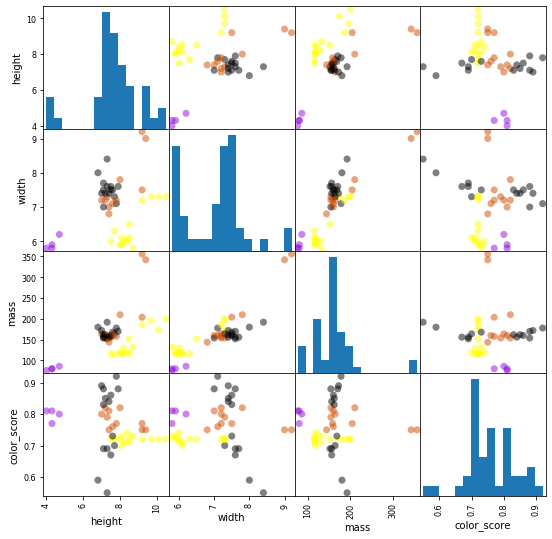

In [80]:
from matplotlib import cm
cmap = cm.get_cmap('gnuplot')  #palette of colors
scatter = pd.plotting.scatter_matrix(X_train, c=y_train,  marker='o', s=50, hist_kwds={'bins':15},
                           figsize=(9,9), cmap=cmap)

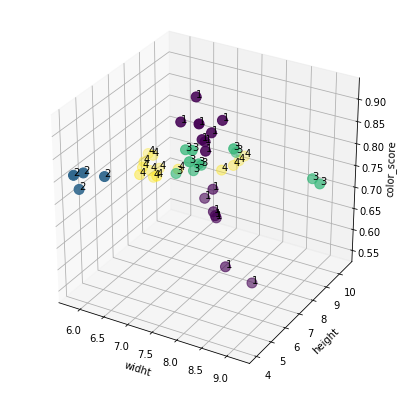

In [87]:
from mpl_toolkits.mplot3d import Axes3D     #3D graph

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter( X_train.width, X_train.height, X_train.color_score, c=y_train, marker='o', s=100 )

#labels--------------------------------------------------------------------------------
for v in zip(X_train.width, X_train.height, X_train.color_score, X_train.fruit_label):
    ax.text(v[0], v[1], v[2], v[3], color='black')
#--------------------------------------------------------------------------------------

ax.set_xlabel('widht'), ax.set_ylabel('height'), ax.set_zlabel('color_score')
plt.show()

$$\huge\textbf{k-Nearest Neighbor classifier algorithm}$$

An object is classified by a plurality vote of its neighbors, with the object being assigned to the class most common among its k-nearest neighbors.

Four things required: 1) Distance metric 2) k = ? 3) Weighting function 4) Aggregation rule

In [9]:
X = data_f[['mass','width','height']]
y = data_f['fruit_label']

X_train, X_test, y_train, y_test = train_test_split(X, y, #train_size=0.60, #no number means 0.75~0.25 proportion
                                                    random_state = 0)

$\textbf{Creating the classifier object}$

In [9]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier( n_neighbors = 5 )

$\textbf{Train the classifier usin the training data}$

In [30]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

$\textbf{Estimate the accuracy of the classifier}$

In [31]:
knn.score(X_test, y_test)

0.5333333333333333

$\textbf{Predict, classify new data}$

In [36]:
f_predicted = knn.predict( [[20, 4.3, 5.5]] )
fruit_name_d[f_predicted[0]]

'mandarin'

$\textbf{Plot decision boundaries of the k-NN classifier}$

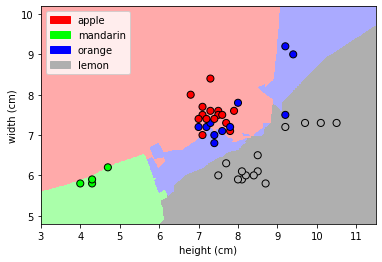

In [47]:
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches
import matplotlib.patches as mpatches

def plot_fruit_knn(X, y, n_neighbors, weights):
    X_0, y_0 = X[['height', 'width']].values , y.values

# Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF','#AFAFAF'])
    cmap_bold  = ListedColormap(['#FF0000', '#00FF00', '#0000FF','#AFAFAF'])  
    
#Classifier
    clf = KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X_0, y_0) 
    
# Plot the decision boundary by assigning a color in the color map
# to each mesh point.
    mesh_step_size = .01  # step size in the mesh
    plot_symbol_size = 50

    x_min, x_max = X_0[:, 0].min() - 1, X_0[:, 0].max() + 1
    y_min, y_max = X_0[:, 1].min() - 1, X_0[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size),
                         np.arange(y_min, y_max, mesh_step_size))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])                    #Predict for each value on the grid
                                                                      #np.c_ create tuples, kind of a transpose
# Put the result into a color plot 
    Z = Z.reshape(xx.shape)
    #plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)                        #Plot each point on the grid with the Z-color
# Plot training points
    plt.scatter(X_0[:, 0], X_0[:, 1], s=plot_symbol_size, c=y, cmap=cmap_bold, edgecolor = 'black')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    patch0 = mpatches.Patch(color='#FF0000', label='apple')
    patch1 = mpatches.Patch(color='#00FF00', label='mandarin')
    patch2 = mpatches.Patch(color='#0000FF', label='orange')
    patch3 = mpatches.Patch(color='#AFAFAF', label='lemon')
    plt.legend(handles=[patch0, patch1, patch2, patch3])
plt.xlabel('height (cm)'), plt.ylabel('width (cm)')
#plt.title("4-Class classification (k = %i, weights = '%s')" % (n_neighbors, weights)) 
plot_fruit_knn(X_train, y_train, 10, 'uniform')

$\textbf{Accuracy vs k}$

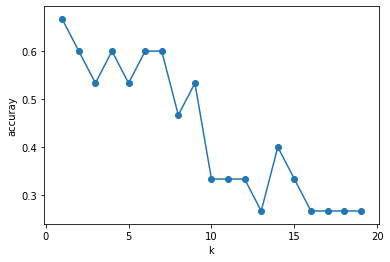

In [65]:
k_range, scores = range(1,20), []

for k in k_range:
    knn = KNeighborsClassifier( n_neighbors=k )
    knn.fit(X_train, y_train)
    scores.append( knn.score(X_test, y_test) )
    
plt.figure()
plt.xlabel('k'), plt.ylabel('accuray')
plt.plot(k_range, scores) , plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20]);